In [1]:
import numpy as np
import pandas as pd

## Numpy Basic

In [6]:
a = np.eye(8)

In [7]:
a[1,:]

array([0., 1., 0., 0., 0., 0., 0., 0.])

In [8]:
a[5,:]

array([0., 0., 0., 0., 0., 1., 0., 0.])

In [14]:
arr2d = np.arange(9).reshape(3,-1)
arr2d[:,0]

array([0, 3, 6])

In [17]:
arr2d[:,:1]

array([[0],
       [3],
       [6]])

In [18]:
b = np.arange(40).reshape(10,-1)
b[[3,2,1,9]] # iloc style

array([[12, 13, 14, 15],
       [ 8,  9, 10, 11],
       [ 4,  5,  6,  7],
       [36, 37, 38, 39]])

In [24]:
arr = np.random.randn(5,3)
arr

array([[ 0.3106557 ,  0.6784504 , -0.66128384],
       [ 0.91224702, -0.92214898, -0.8218954 ],
       [ 0.29463868,  0.27366227, -0.01064161],
       [-0.87647049,  0.26600532,  1.2257925 ],
       [-0.26391087,  1.63878977,  0.55897257]])

In [25]:
arr.sort(0)

In [26]:
arr

array([[-0.87647049, -0.92214898, -0.8218954 ],
       [-0.26391087,  0.26600532, -0.66128384],
       [ 0.29463868,  0.27366227, -0.01064161],
       [ 0.3106557 ,  0.6784504 ,  0.55897257],
       [ 0.91224702,  1.63878977,  1.2257925 ]])

In [22]:
arr.sort(1)

In [23]:
arr

array([[-1.85608308, -1.36549328, -1.1381171 ],
       [-0.75923144, -0.26644469, -0.24324544],
       [-0.58434102, -0.25306099, -0.13531312],
       [ 0.17991356,  0.4760847 ,  0.81151403],
       [ 0.53164847,  0.9069392 ,  2.1349857 ]])

## Pandas Basic

In [27]:
frame = pd.DataFrame(np.arange(9).reshape(3,-1), index = ['a','c','d'],\
                    columns=['OH', 'TX', 'Cal'])

In [28]:
frame

,OH,TX,Cal
a,0,1,2
c,3,4,5
d,6,7,8


In [29]:
frame.reindex(['a','b','c','d'])

,OH,TX,Cal
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [30]:
frame.loc[['a','b','c'], ['OH','nan','TX']]

C:\Users\KTH\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,OH,nan,TX
a,0.0,NaN,1.0
b,NaN,NaN,NaN
c,3.0,NaN,4.0


In [31]:
frame = pd.DataFrame(np.random.randn(4,3), columns=list('bde'),
                    index=['U','O','T','Or'])

In [32]:
frame

,b,d,e
U,0.090721,1.662827,0.415169
O,-1.533663,0.772339,1.480585
T,-0.218803,0.341488,0.082808
Or,-0.045007,1.005499,0.458414


In [35]:
frame.apply(lambda x: x.max()-x.min(), axis=0) # axis=0 : row를 따라 : 1개 col을 넣어줌

b    1.624384
d    1.321339
e    1.397776
dtype: float64

In [38]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min','max'])

In [40]:
frame.apply(f, axis=1)

,min,max
U,0.090721,1.662827
O,-1.533663,1.480585
T,-0.218803,0.341488
Or,-0.045007,1.005499


In [41]:
frame.apply(f, axis=0)

,b,d,e
min,-1.533663,0.341488,0.082808
max,0.090721,1.662827,1.480585


In [60]:
frame.applymap(lambda x: float('{0:.2f}'.format(x)))

,b,d,e
U,0.09,1.66,0.42
O,-1.53,0.77,1.48
T,-0.22,0.34,0.08
Or,-0.05,1.01,0.46


In [61]:
ser = pd.Series([2,3,1,2,4,1,2])
ser.rank()

0    4.0
1    6.0
2    1.5
3    4.0
4    7.0
5    1.5
6    4.0
dtype: float64

In [62]:
ser.rank(method='first')

0    3.0
1    6.0
2    1.0
3    4.0
4    7.0
5    2.0
6    5.0
dtype: float64

In [63]:
ser.rank(method='max')

0    5.0
1    6.0
2    2.0
3    5.0
4    7.0
5    2.0
6    5.0
dtype: float64

In [64]:
ser.rank(method='min')

0    3.0
1    6.0
2    1.0
3    3.0
4    7.0
5    1.0
6    3.0
dtype: float64

In [65]:
frame.count()

b    4
d    4
e    4
dtype: int64

In [66]:
frame

,b,d,e
U,0.090721,1.662827,0.415169
O,-1.533663,0.772339,1.480585
T,-0.218803,0.341488,0.082808
Or,-0.045007,1.005499,0.458414


In [67]:
frame.mean()

b   -0.426688
d    0.945538
e    0.609244
dtype: float64

In [68]:
frame.mean(axis=1)

U     0.722906
O     0.239754
T     0.068498
Or    0.472969
dtype: float64

## Series

In [2]:
obj = pd.Series(['c','a','d','a','a','b','c','c'])

In [3]:
obj.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [4]:
obj.value_counts()

c    3
a    3
d    1
b    1
dtype: int64

In [7]:
pd.value_counts(obj.values, sort=True)

c    3
a    3
d    1
b    1
dtype: int64

In [8]:
mask = obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
dtype: bool

In [9]:
obj[mask]

0    c
5    b
6    c
7    c
dtype: object

In [10]:
data = pd.DataFrame({'Qu1': [1,3,4,2,1],
                     'Qu2': [1,3,1,2,3],
                     'Qu3': [1,5,2,4,4]})

In [11]:
data

,Qu1,Qu2,Qu3
0,1,1,1
1,3,3,5
2,4,1,2
3,2,2,4
4,1,3,4


In [14]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,0.0
4,1.0,0.0,2.0
5,0.0,0.0,1.0


In [18]:
data.apply(pd.value_counts)

,Qu1,Qu2,Qu3
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,NaN
4,1.0,NaN,2.0
5,NaN,NaN,1.0


In [19]:
data.columns=['a','b','c']

In [20]:
data

,a,b,c
0,1,1,1
1,3,3,5
2,4,1,2
3,2,2,4
4,1,3,4


In [22]:
data.apply(lambda x: x['a'] - x['c'] ,axis=1) 
# 아하 이런식으로 여러개 컬럼을 한꺼번에 사용가능!

0    0
1   -2
2    2
3   -2
4   -3
dtype: int64

In [24]:
data.apply(lambda x: x.mean()) # axis=0이면 row들을 합침

a    2.2
b    2.0
c    3.2
dtype: float64

In [25]:
data.applymap(lambda x : x-10)

,a,b,c
0,-9,-9,-9
1,-7,-7,-5
2,-6,-9,-8
3,-8,-8,-6
4,-9,-7,-6


In [34]:
def makeprop(dat):
    dat['new'] = dat['b'] / dat['b'].sum()
    return dat

In [35]:
data.apply(makeprop, axis=1)

,a,b,c,new
0,1.0,1.0,1.0,1.0
1,3.0,3.0,5.0,1.0
2,4.0,1.0,2.0,1.0
3,2.0,2.0,4.0,1.0
4,1.0,3.0,4.0,1.0


In [36]:
data.groupby('b').apply(makeprop)

,a,b,c,new
0,1,1,1,0.5
1,3,3,5,0.5
2,4,1,2,0.5
3,2,2,4,1.0
4,1,3,4,0.5


In [39]:
data.name = 'idx'

In [40]:
data.name

'idx'

In [41]:
data

,a,b,c
0,1,1,1
1,3,3,5
2,4,1,2
3,2,2,4
4,1,3,4


In [42]:
data.index

RangeIndex(start=0, stop=5, step=1)

In [44]:
data.apply(lambda x :x.name +1, axis=1)

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [45]:
data.index.name

In [48]:
data.apply(pd.value_counts).fillna(0)

,a,b,c
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,0.0
4,1.0,0.0,2.0
5,0.0,0.0,1.0


In [50]:
data.apply(pd.value_counts, axis=1)

,1,2,3,4,5
0,3.0,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,NaN,1.0
2,1.0,1.0,NaN,1.0,NaN
3,NaN,2.0,NaN,1.0,NaN
4,1.0,NaN,1.0,1.0,NaN


In [51]:
data

,a,b,c
0,1,1,1
1,3,3,5
2,4,1,2
3,2,2,4
4,1,3,4


In [107]:
df = data.apply(pd.value_counts)

In [108]:
df.loc[5,'c'] = np.nan
df

,a,b,c
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,NaN
4,1.0,NaN,2.0
5,NaN,NaN,NaN


In [109]:
df.dropna(how='any')

,a,b,c
1,2.0,2.0,1.0
2,1.0,1.0,1.0


In [110]:
df.dropna(how='all')

,a,b,c
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,NaN
4,1.0,NaN,2.0


In [111]:
df.dropna(thresh=2)

,a,b,c
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,NaN
4,1.0,NaN,2.0


In [112]:
df.fillna({'a':df['a'].mean(), 'b':0, 'c':0.25})

,a,b,c
1,2.00,2.0,1.00
2,1.00,1.0,1.00
3,1.00,2.0,0.25
4,1.00,0.0,2.00
5,1.25,0.0,0.25


In [113]:
df

,a,b,c
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,NaN
4,1.0,NaN,2.0
5,NaN,NaN,NaN


In [114]:
df.fillna(method='ffill')

,a,b,c
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,1.0
4,1.0,2.0,2.0
5,1.0,2.0,2.0


In [115]:
df.fillna(method='bfill')

,a,b,c
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,2.0
4,1.0,NaN,2.0
5,NaN,NaN,NaN


In [116]:
df.index.names = ['key1']

In [117]:
df

,a,b,c
key1,,,
1,2.0,2.0,1.0
2,1.0,1.0,1.0
3,1.0,2.0,NaN
4,1.0,NaN,2.0
5,NaN,NaN,NaN


In [118]:
df.index = pd.MultiIndex.from_arrays([['ap','ap','bp','bp','bp'],['1','2','1','2','3']],\
                                    names=['key1','key2'])

In [119]:
df

a    b    c
key1 key2               
ap   1     2.0  2.0  1.0
     2     1.0  1.0  1.0
bp   1     1.0  2.0  NaN
     2     1.0  NaN  2.0
     3     NaN  NaN  NaN

In [120]:
df.unstack()

a             b             c         
key2    1    2   3    1    2   3    1    2   3
key1                                          
ap    2.0  1.0 NaN  2.0  1.0 NaN  1.0  1.0 NaN
bp    1.0  1.0 NaN  2.0  NaN NaN  NaN  2.0 NaN

In [121]:
df

a    b    c
key1 key2               
ap   1     2.0  2.0  1.0
     2     1.0  1.0  1.0
bp   1     1.0  2.0  NaN
     2     1.0  NaN  2.0
     3     NaN  NaN  NaN

In [122]:
df['a']

key1  key2
ap    1       2.0
      2       1.0
bp    1       1.0
      2       1.0
      3       NaN
Name: a, dtype: float64

In [123]:
df.a.unstack()

key2,1,2,3
key1,,,
ap,2.0,1.0,NaN
bp,1.0,1.0,NaN


In [124]:
df.swaplevel('key1','key2')

,,a,b,c
key2,key1,,,
1,ap,2.0,2.0,1.0
2,ap,1.0,1.0,1.0
1,bp,1.0,2.0,NaN
2,bp,1.0,NaN,2.0
3,bp,NaN,NaN,NaN


In [125]:
df.swaplevel('key1','key2').sort_values(by='key2')

a    b    c
key2 key1               
1    ap    2.0  2.0  1.0
     bp    1.0  2.0  NaN
2    ap    1.0  1.0  1.0
     bp    1.0  NaN  2.0
3    bp    NaN  NaN  NaN

In [126]:
df.swaplevel('key1','key2').sort_values(by='key2').reset_index()

,key2,key1,a,b,c
0,1,ap,2.0,2.0,1.0
1,1,bp,1.0,2.0,NaN
2,2,ap,1.0,1.0,1.0
3,2,bp,1.0,NaN,2.0
4,3,bp,NaN,NaN,NaN


In [127]:
df

a    b    c
key1 key2               
ap   1     2.0  2.0  1.0
     2     1.0  1.0  1.0
bp   1     1.0  2.0  NaN
     2     1.0  NaN  2.0
     3     NaN  NaN  NaN

In [128]:
df.sum(level='key1') #groupby처럼 쓸 수 있음

,a,b,c
key1,,,
ap,3.0,3.0,2.0
bp,2.0,2.0,2.0


In [129]:
df.groupby('key1').sum()

,a,b,c
key1,,,
ap,3.0,3.0,2.0
bp,2.0,2.0,2.0


In [130]:
df

a    b    c
key1 key2               
ap   1     2.0  2.0  1.0
     2     1.0  1.0  1.0
bp   1     1.0  2.0  NaN
     2     1.0  NaN  2.0
     3     NaN  NaN  NaN

In [131]:
df = df.reset_index()
df

,key1,key2,a,b,c
0,ap,1,2.0,2.0,1.0
1,ap,2,1.0,1.0,1.0
2,bp,1,1.0,2.0,NaN
3,bp,2,1.0,NaN,2.0
4,bp,3,NaN,NaN,NaN


In [132]:
df = df.fillna(0).set_index(['a','c'])

In [133]:
df

key1 key2    b
a   c                 
2.0 1.0   ap    1  2.0
1.0 1.0   ap    2  1.0
    0.0   bp    1  2.0
    2.0   bp    2  0.0
0.0 0.0   bp    3  0.0

In [135]:
df.sort_values('a', ascending=True)

key1 key2    b
a   c                 
0.0 0.0   bp    3  0.0
1.0 1.0   ap    2  1.0
    0.0   bp    1  2.0
    2.0   bp    2  0.0
2.0 1.0   ap    1  2.0

### Merge

In [140]:
df1 = pd.DataFrame({'key' : ['b','b','a','c','a','b'],
                    'data1' : range(6)})
df2 = pd.DataFrame({'key' : ['a','b','a','b','d'],
                    'data2' : range(5)})

In [141]:
df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [142]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [143]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [149]:
df_t = pd.merge(df1,df2,on='key',how='left').sort_values(by='key').reset_index(drop=True)
df_t

,key,data1,data2
0,a,2,0.0
1,a,2,2.0
2,a,4,0.0
3,a,4,2.0
4,b,0,1.0
5,b,0,3.0
6,b,1,1.0
7,b,1,3.0
8,b,5,1.0
9,b,5,3.0


In [153]:
# 만약 그냥 딱 왼쪽놈만 합치고프면 : 이거 좀 비효율적이지 않나?
df_t.pivot_table('data1',index='key',columns='data2',aggfunc='mean')

data2,0.0,1.0,2.0,3.0
key,,,,
a,3.0,NaN,3.0,NaN
b,NaN,2.0,NaN,2.0


In [154]:
pd.merge(df1,df2,on='key',how='inner') # 둘이 공통으로 가진 값들의 데카르트 곱 반환

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [162]:
df_1 = pd.DataFrame(np.arange(20).reshape(10,-1), columns=['a','b'])
df_1['a'] = range(10)
df_1

,a,b
0,0,1
1,1,3
2,2,5
3,3,7
4,4,9
5,5,11
6,6,13
7,7,15
8,8,17
9,9,19


In [163]:
df_2 = pd.DataFrame({'a':np.arange(10),'b':np.arange(40,60,2)})
df_2

,a,b
0,0,40
1,1,42
2,2,44
3,3,46
4,4,48
5,5,50
6,6,52
7,7,54
8,8,56
9,9,58


In [165]:
pd.merge(df_1,df_2, on='a') # 만약 key가 중복이 없으면 그대로 나오징! join대로!

,a,b_x,b_y
0,0,1,40
1,1,3,42
2,2,5,44
3,3,7,46
4,4,9,48
5,5,11,50
6,6,13,52
7,7,15,54
8,8,17,56
9,9,19,58


In [7]:
idx = pd.date_range('1/1/2000',periods=1000)

In [9]:
ser = pd.Series(range(1000),index=idx)

In [10]:
ser.head()

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
Freq: D, dtype: int64

In [13]:
ser.index[2]

Timestamp('2000-01-03 00:00:00', freq='D')

In [18]:
datetime(2000,1,1)

datetime.datetime(2000, 1, 1, 0, 0)

In [20]:
ser.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

In [25]:
pd.DataFrame(ser).resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [27]:
df = pd.DataFrame(ser)
df.head()

,0
2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4


In [30]:
df.resample('D').mean()

,0
2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6
2000-01-08,7
2000-01-09,8
2000-01-10,9


In [36]:
pd.date_range('1/1/2000',periods=4,freq='MS')

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01'], dtype='datetime64[ns]', freq='MS')

In [40]:
ser.resample('M',how='mean',kind='period')

C:\Users\KTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


2000-01     15.0
2000-02     45.0
2000-03     75.0
2000-04    105.5
2000-05    136.0
2000-06    166.5
2000-07    197.0
2000-08    228.0
2000-09    258.5
2000-10    289.0
2000-11    319.5
2000-12    350.0
2001-01    381.0
2001-02    410.5
2001-03    440.0
2001-04    470.5
2001-05    501.0
2001-06    531.5
2001-07    562.0
2001-08    593.0
2001-09    623.5
2001-10    654.0
2001-11    684.5
2001-12    715.0
2002-01    746.0
2002-02    775.5
2002-03    805.0
2002-04    835.5
2002-05    866.0
2002-06    896.5
2002-07    927.0
2002-08    958.0
2002-09    986.5
Freq: M, dtype: float64

In [43]:
df = pd.DataFrame(np.arange(12), index=pd.date_range('1/1/2000', periods=12, freq='T'))

In [44]:
df

,0
2000-01-01 00:00:00,0
2000-01-01 00:01:00,1
2000-01-01 00:02:00,2
2000-01-01 00:03:00,3
2000-01-01 00:04:00,4
2000-01-01 00:05:00,5
2000-01-01 00:06:00,6
2000-01-01 00:07:00,7
2000-01-01 00:08:00,8
2000-01-01 00:09:00,9


In [49]:
df.resample('5min', how='sum')

C:\Users\KTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


,0
2000-01-01 00:00:00,10
2000-01-01 00:05:00,35
2000-01-01 00:10:00,21


In [50]:
df.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            2000],
           dtype='int64')

In [51]:
df.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='int64')

In [52]:
df.index.day

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype='int64')

In [53]:
df.index.hour

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype='int64')

In [54]:
df.index.minute

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [56]:
df['new_date'] = pd.date_range('1/1/2019', periods=12)

In [57]:
df['new_date']

2000-01-01 00:00:00   2019-01-01
2000-01-01 00:01:00   2019-01-02
2000-01-01 00:02:00   2019-01-03
2000-01-01 00:03:00   2019-01-04
2000-01-01 00:04:00   2019-01-05
2000-01-01 00:05:00   2019-01-06
2000-01-01 00:06:00   2019-01-07
2000-01-01 00:07:00   2019-01-08
2000-01-01 00:08:00   2019-01-09
2000-01-01 00:09:00   2019-01-10
2000-01-01 00:10:00   2019-01-11
2000-01-01 00:11:00   2019-01-12
Freq: T, Name: new_date, dtype: datetime64[ns]

In [61]:
df['new_date'][2] = pd.Timestamp(2000,1,1)

C:\Users\KTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [62]:
df

,0,new_date
2000-01-01 00:00:00,0,2019-01-01
2000-01-01 00:01:00,1,2019-01-02
2000-01-01 00:02:00,2,2000-01-01
2000-01-01 00:03:00,3,2019-01-04
2000-01-01 00:04:00,4,2019-01-05
2000-01-01 00:05:00,5,2019-01-06
2000-01-01 00:06:00,6,2019-01-07
2000-01-01 00:07:00,7,2019-01-08
2000-01-01 00:08:00,8,2019-01-09
2000-01-01 00:09:00,9,2019-01-10


In [65]:
df.loc[df[0]==1,0]

2000-01-01 00:01:00    1
Freq: T, Name: 0, dtype: int32

In [67]:
df.loc[df[0]==1,'new_date']

2000-01-01 00:01:00   2019-01-02
Freq: T, Name: new_date, dtype: datetime64[ns]

In [69]:
group = pd.qcut(df['new_date'],4)
group

2000-01-01 00:00:00    (1999-12-31 23:59:59.999999999, 2019-01-03 12:...
2000-01-01 00:01:00    (1999-12-31 23:59:59.999999999, 2019-01-03 12:...
2000-01-01 00:02:00    (1999-12-31 23:59:59.999999999, 2019-01-03 12:...
2000-01-01 00:03:00           (2019-01-03 12:00:00, 2019-01-06 12:00:00]
2000-01-01 00:04:00           (2019-01-03 12:00:00, 2019-01-06 12:00:00]
2000-01-01 00:05:00           (2019-01-03 12:00:00, 2019-01-06 12:00:00]
2000-01-01 00:06:00           (2019-01-06 12:00:00, 2019-01-09 06:00:00]
2000-01-01 00:07:00           (2019-01-06 12:00:00, 2019-01-09 06:00:00]
2000-01-01 00:08:00           (2019-01-06 12:00:00, 2019-01-09 06:00:00]
2000-01-01 00:09:00                    (2019-01-09 06:00:00, 2019-01-12]
2000-01-01 00:10:00                    (2019-01-09 06:00:00, 2019-01-12]
2000-01-01 00:11:00                    (2019-01-09 06:00:00, 2019-01-12]
Freq: T, Name: new_date, dtype: category
Categories (4, interval[datetime64[ns]]): [(1999-12-31 23:59:59.999999999, 2019-01-

In [70]:
df.groupby(group)[0].sum()

new_date
(1999-12-31 23:59:59.999999999, 2019-01-03 12:00:00]     3
(2019-01-03 12:00:00, 2019-01-06 12:00:00]              12
(2019-01-06 12:00:00, 2019-01-09 06:00:00]              21
(2019-01-09 06:00:00, 2019-01-12]                       30
Name: 0, dtype: int32

In [71]:
g2 = pd.cut(df['new_date'],4)

In [72]:
g2

2000-01-01 00:00:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:01:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:02:00    (1999-12-25 01:10:33.600000, 2004-10-03 18:00:00]
2000-01-01 00:03:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:04:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:05:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:06:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:07:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:08:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:09:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:10:00                    (2014-04-10 06:00:00, 2019-01-12]
2000-01-01 00:11:00                    (2014-04-10 06:00:00, 2019-01-12]
Freq: T, Name: new_date, dtype: category
Categories (4, interval[datetime64[ns]]): [(1999-12-25 01:10:33.600000, 2004-10-03 

In [73]:
len(g2)

12

In [77]:
df.groupby(group)[0].count()

new_date
(1999-12-31 23:59:59.999999999, 2019-01-03 12:00:00]    3
(2019-01-03 12:00:00, 2019-01-06 12:00:00]              3
(2019-01-06 12:00:00, 2019-01-09 06:00:00]              3
(2019-01-09 06:00:00, 2019-01-12]                       3
Name: 0, dtype: int64

In [78]:
df.groupby(g2)[0].count()

new_date
(1999-12-25 01:10:33.600000, 2004-10-03 18:00:00]     1
(2004-10-03 18:00:00, 2009-07-07 12:00:00]            0
(2009-07-07 12:00:00, 2014-04-10 06:00:00]            0
(2014-04-10 06:00:00, 2019-01-12]                    11
Name: 0, dtype: int64

In [81]:
df['category_by_new'] = pd.qcut(df['new_date'],3,labels=['groupA','groupB','groupC'])

In [82]:
df

,0,new_date,category_by_new
2000-01-01 00:00:00,0,2019-01-01,groupA
2000-01-01 00:01:00,1,2019-01-02,groupA
2000-01-01 00:02:00,2,2000-01-01,groupA
2000-01-01 00:03:00,3,2019-01-04,groupA
2000-01-01 00:04:00,4,2019-01-05,groupB
2000-01-01 00:05:00,5,2019-01-06,groupB
2000-01-01 00:06:00,6,2019-01-07,groupB
2000-01-01 00:07:00,7,2019-01-08,groupB
2000-01-01 00:08:00,8,2019-01-09,groupC
2000-01-01 00:09:00,9,2019-01-10,groupC


In [99]:
df.fillna('groupA', inplace=True)
df.loc[df['category_by_new']=='groupA','new_date'] = np.nan

In [100]:
df

,0,new_date,category_by_new
2000-01-01 00:00:00,0,NaT,groupA
2000-01-01 00:01:00,1,NaT,groupA
2000-01-01 00:02:00,2,NaT,groupA
2000-01-01 00:03:00,3,NaT,groupA
2000-01-01 00:04:00,4,2019-01-05,groupB
2000-01-01 00:05:00,5,2019-01-06,groupB
2000-01-01 00:06:00,6,2019-01-07,groupB
2000-01-01 00:07:00,7,2019-01-08,groupB
2000-01-01 00:08:00,8,2019-01-09,groupC
2000-01-01 00:09:00,9,2019-01-10,groupC


In [111]:
df['new_date'].isnull()

2000-01-01 00:00:00     True
2000-01-01 00:01:00     True
2000-01-01 00:02:00     True
2000-01-01 00:03:00     True
2000-01-01 00:04:00    False
2000-01-01 00:05:00    False
2000-01-01 00:06:00    False
2000-01-01 00:07:00    False
2000-01-01 00:08:00    False
2000-01-01 00:09:00    False
2000-01-01 00:10:00    False
2000-01-01 00:11:00    False
Freq: T, Name: new_date, dtype: bool

In [102]:
df[df['new_date'].isnull()]

,0,new_date,category_by_new
2000-01-01 00:00:00,0,NaT,groupA
2000-01-01 00:01:00,1,NaT,groupA
2000-01-01 00:02:00,2,NaT,groupA
2000-01-01 00:03:00,3,NaT,groupA


In [114]:
df[df.notnull()]

,0,new_date,category_by_new
2000-01-01 00:00:00,0,NaT,groupA
2000-01-01 00:01:00,1,NaT,groupA
2000-01-01 00:02:00,2,NaT,groupA
2000-01-01 00:03:00,3,NaT,groupA
2000-01-01 00:04:00,4,2019-01-05,groupB
2000-01-01 00:05:00,5,2019-01-06,groupB
2000-01-01 00:06:00,6,2019-01-07,groupB
2000-01-01 00:07:00,7,2019-01-08,groupB
2000-01-01 00:08:00,8,2019-01-09,groupC
2000-01-01 00:09:00,9,2019-01-10,groupC


In [119]:
df[df.isnull().values]

,0,new_date,category_by_new
2000-01-01 00:00:00,0,NaT,groupA
2000-01-01 00:01:00,1,NaT,groupA
2000-01-01 00:02:00,2,NaT,groupA
2000-01-01 00:03:00,3,NaT,groupA


In [120]:
df.loc[df[0]==11, 'category_by_new'] = np.nan

In [121]:
df

,0,new_date,category_by_new
2000-01-01 00:00:00,0,NaT,groupA
2000-01-01 00:01:00,1,NaT,groupA
2000-01-01 00:02:00,2,NaT,groupA
2000-01-01 00:03:00,3,NaT,groupA
2000-01-01 00:04:00,4,2019-01-05,groupB
2000-01-01 00:05:00,5,2019-01-06,groupB
2000-01-01 00:06:00,6,2019-01-07,groupB
2000-01-01 00:07:00,7,2019-01-08,groupB
2000-01-01 00:08:00,8,2019-01-09,groupC
2000-01-01 00:09:00,9,2019-01-10,groupC


In [123]:
df[df.isnull().values]

,0,new_date,category_by_new
2000-01-01 00:00:00,0,NaT,groupA
2000-01-01 00:01:00,1,NaT,groupA
2000-01-01 00:02:00,2,NaT,groupA
2000-01-01 00:03:00,3,NaT,groupA
2000-01-01 00:11:00,11,2019-01-12,NaN


In [124]:
df.isnull().values

array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False, False],
       [False, False,  True]])

In [139]:
df.loc[df[0]==11, 'new_date'] = np.nan

In [140]:
df['nan_count'] = df.isnull().sum(axis=1)

In [141]:
df

,0,new_date,category_by_new,count_nan,nan_count
2000-01-01 00:00:00,0,NaT,groupA,0,1
2000-01-01 00:01:00,1,NaT,groupA,0,1
2000-01-01 00:02:00,2,NaT,groupA,0,1
2000-01-01 00:03:00,3,NaT,groupA,0,1
2000-01-01 00:04:00,4,2019-01-05,groupB,0,0
2000-01-01 00:05:00,5,2019-01-06,groupB,0,0
2000-01-01 00:06:00,6,2019-01-07,groupB,0,0
2000-01-01 00:07:00,7,2019-01-08,groupB,0,0
2000-01-01 00:08:00,8,2019-01-09,groupC,0,0
2000-01-01 00:09:00,9,2019-01-10,groupC,0,0


In [153]:
def count_nan(data):
    data['group_nan_count'] = data.isnull().sum(axis=1).sum()
    return data

In [156]:
df.loc[df[0]==11, 'category_by_new'] = 'groupC'

In [157]:
df.groupby('category_by_new').apply(count_nan)

,0,new_date,category_by_new,count_nan,nan_count,group_nan_count
2000-01-01 00:00:00,0,NaT,groupA,0,1,4
2000-01-01 00:01:00,1,NaT,groupA,0,1,4
2000-01-01 00:02:00,2,NaT,groupA,0,1,4
2000-01-01 00:03:00,3,NaT,groupA,0,1,4
2000-01-01 00:04:00,4,2019-01-05,groupB,0,0,0
2000-01-01 00:05:00,5,2019-01-06,groupB,0,0,0
2000-01-01 00:06:00,6,2019-01-07,groupB,0,0,0
2000-01-01 00:07:00,7,2019-01-08,groupB,0,0,0
2000-01-01 00:08:00,8,2019-01-09,groupC,0,0,1
2000-01-01 00:09:00,9,2019-01-10,groupC,0,0,1


In [145]:
df.isnull().sum()

0                  0
new_date           5
category_by_new    1
count_nan          0
nan_count          0
dtype: int64

In [155]:
df

,0,new_date,category_by_new,count_nan,nan_count
2000-01-01 00:00:00,0,NaT,groupA,0,1
2000-01-01 00:01:00,1,NaT,groupA,0,1
2000-01-01 00:02:00,2,NaT,groupA,0,1
2000-01-01 00:03:00,3,NaT,groupA,0,1
2000-01-01 00:04:00,4,2019-01-05,groupB,0,0
2000-01-01 00:05:00,5,2019-01-06,groupB,0,0
2000-01-01 00:06:00,6,2019-01-07,groupB,0,0
2000-01-01 00:07:00,7,2019-01-08,groupB,0,0
2000-01-01 00:08:00,8,2019-01-09,groupC,0,0
2000-01-01 00:09:00,9,2019-01-10,groupC,0,0


In [162]:
nd_null_count = df['new_date'].isnull().sum()
nd_null_count

5

In [180]:
nd_null_random_list = np.random.randint(0,5,size=nd_null_count)

In [181]:
pd.date_range('1/1/2000',periods=20).to_series().sample(2)

2000-01-14   2000-01-14
2000-01-17   2000-01-17
Freq: 3D, dtype: datetime64[ns]

In [182]:
nd_null_random_list

array([0, 0, 1, 0, 2])

In [183]:
df.loc[df['new_date'].isnull(),'new_date'] = nd_null_random_list

In [184]:
df

,0,new_date,category_by_new,count_nan,nan_count
2000-01-01 00:00:00,0,0,groupA,0,1
2000-01-01 00:01:00,1,0,groupA,0,1
2000-01-01 00:02:00,2,1,groupA,0,1
2000-01-01 00:03:00,3,0,groupA,0,1
2000-01-01 00:04:00,4,2019-01-05 00:00:00,groupB,0,0
2000-01-01 00:05:00,5,2019-01-06 00:00:00,groupB,0,0
2000-01-01 00:06:00,6,2019-01-07 00:00:00,groupB,0,0
2000-01-01 00:07:00,7,2019-01-08 00:00:00,groupB,0,0
2000-01-01 00:08:00,8,2019-01-09 00:00:00,groupC,0,0
2000-01-01 00:09:00,9,2019-01-10 00:00:00,groupC,0,0


In [189]:
df['categorical_count'] = pd.cut(df['nan_count'],3, labels=['ga','na','da'])
df['categorical_count_raw'] = pd.cut(df['nan_count'],3)

In [190]:
df

,0,new_date,category_by_new,count_nan,nan_count,categorical_count,categorical_count_raw
2000-01-01 00:00:00,0,0,groupA,0,1,na,"(0.667, 1.333]"
2000-01-01 00:01:00,1,0,groupA,0,1,na,"(0.667, 1.333]"
2000-01-01 00:02:00,2,1,groupA,0,1,na,"(0.667, 1.333]"
2000-01-01 00:03:00,3,0,groupA,0,1,na,"(0.667, 1.333]"
2000-01-01 00:04:00,4,2019-01-05 00:00:00,groupB,0,0,ga,"(-0.002, 0.667]"
2000-01-01 00:05:00,5,2019-01-06 00:00:00,groupB,0,0,ga,"(-0.002, 0.667]"
2000-01-01 00:06:00,6,2019-01-07 00:00:00,groupB,0,0,ga,"(-0.002, 0.667]"
2000-01-01 00:07:00,7,2019-01-08 00:00:00,groupB,0,0,ga,"(-0.002, 0.667]"
2000-01-01 00:08:00,8,2019-01-09 00:00:00,groupC,0,0,ga,"(-0.002, 0.667]"
2000-01-01 00:09:00,9,2019-01-10 00:00:00,groupC,0,0,ga,"(-0.002, 0.667]"


In [194]:
df['len_count'] = df['categorical_count'].str.len()

In [195]:
df

,0,new_date,category_by_new,count_nan,nan_count,categorical_count,categorical_count_raw,len_count
2000-01-01 00:00:00,0,0,groupA,0,1,na,"(0.667, 1.333]",2
2000-01-01 00:01:00,1,0,groupA,0,1,na,"(0.667, 1.333]",2
2000-01-01 00:02:00,2,1,groupA,0,1,na,"(0.667, 1.333]",2
2000-01-01 00:03:00,3,0,groupA,0,1,na,"(0.667, 1.333]",2
2000-01-01 00:04:00,4,2019-01-05 00:00:00,groupB,0,0,ga,"(-0.002, 0.667]",2
2000-01-01 00:05:00,5,2019-01-06 00:00:00,groupB,0,0,ga,"(-0.002, 0.667]",2
2000-01-01 00:06:00,6,2019-01-07 00:00:00,groupB,0,0,ga,"(-0.002, 0.667]",2
2000-01-01 00:07:00,7,2019-01-08 00:00:00,groupB,0,0,ga,"(-0.002, 0.667]",2
2000-01-01 00:08:00,8,2019-01-09 00:00:00,groupC,0,0,ga,"(-0.002, 0.667]",2
2000-01-01 00:09:00,9,2019-01-10 00:00:00,groupC,0,0,ga,"(-0.002, 0.667]",2


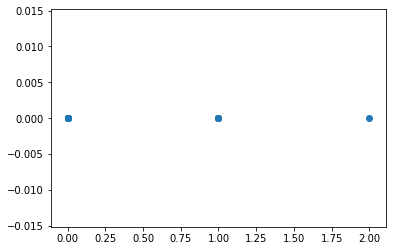

In [209]:
import matplotlib.pyplot as plt
plt.scatter(x=df['nan_count'], y=df['count_nan'], label=df['categorical_count'])

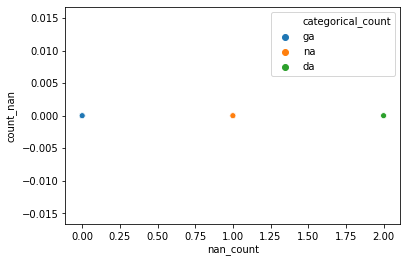

In [210]:
import seaborn as sns
sns.scatterplot(data=df, x='nan_count',y='count_nan', hue='categorical_count')